In [1]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d, avg_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tensorflow as tf
import numpy as np

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
def shuffle2geather(A,B):
    import numpy as np
    RNG_state = np.random.get_state()
    np.random.shuffle(A)
    np.random.set_state(RNG_state)
    np.random.shuffle(B)

In [40]:
import tflearn.datasets.mnist as mnist
X, Y, test_x, test_y = mnist.load_data(one_hot=True)
Kaggle_data = unpickle("MNIST_data/Kaggle_Dataset")
Kaggle_Train_x = Kaggle_data['train_x']
Kaggle_Train_y = Kaggle_data['train_y']
Kaggle_Test_x = Kaggle_data['test_x']

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [5]:
Kaggle_Train_Test_x = Kaggle_Train_x[30000:42000]
Kaggle_Train_Test_y = Kaggle_Train_y[30000:42000]

In [6]:
Kaggle_Train_x.shape

(42000, 784)

In [7]:
X = np.concatenate([X,Kaggle_Train_x[0:30000]])
Y = np.concatenate([Y,Kaggle_Train_y[0:30000]])
shuffle2geather(X,Y)

In [8]:
X = X.reshape([-1, 28, 28])
test_x = test_x.reshape([-1, 28, 28])
Kaggle_Train_Test_x = Kaggle_Train_Test_x.reshape([-1,28,28])

In [9]:
tf.reset_default_graph()

convnet = input_data(shape=[None, 28, 28], name='input')

convnet = tflearn.lstm(convnet, 28, return_seq=True)

convnet = tflearn.lstm(convnet, 64)

convnet = tflearn.reshape(convnet,[-1,8,8,1])

convnet = conv_2d(convnet, 64, 4, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 4, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 4, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = avg_pool_2d(convnet, 3)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.7)

#convnet = tflearn.lstm(convnet, 3)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.75)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.85)

convnet = fully_connected(convnet, 10, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=1e-3, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_verbose=0)


In [11]:
model.load("MNIST_kaggle")

INFO:tensorflow:Restoring parameters from C:\Users\Shachi Shah\Tensorflow Projects\MNIST\MNIST_kaggle


In [14]:
model.fit({'input': X}, {'targets': Y}, n_epoch=5, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id="MNIST_kaggle")

Training Step: 30543  | total loss: 0.17107 | time: 117.245s
| Adam | epoch: 015 | loss: 0.17107 - acc: 0.9807 -- iter: 84992/85000
Training Step: 30544  | total loss: 0.15544 | time: 121.164s
| Adam | epoch: 015 | loss: 0.15544 - acc: 0.9826 | val_loss: 0.06487 - val_acc: 0.9837 -- iter: 85000/85000
--


In [13]:
model.save("MNIST_kaggle")

INFO:tensorflow:C:\Users\Shachi Shah\Tensorflow Projects\MNIST\MNIST_kaggle is not in all_model_checkpoint_paths. Manually adding it.
Type is unsupported, or the types of the items don't match field type in CollectionDef.
'list' object has no attribute 'name'


## Visualization

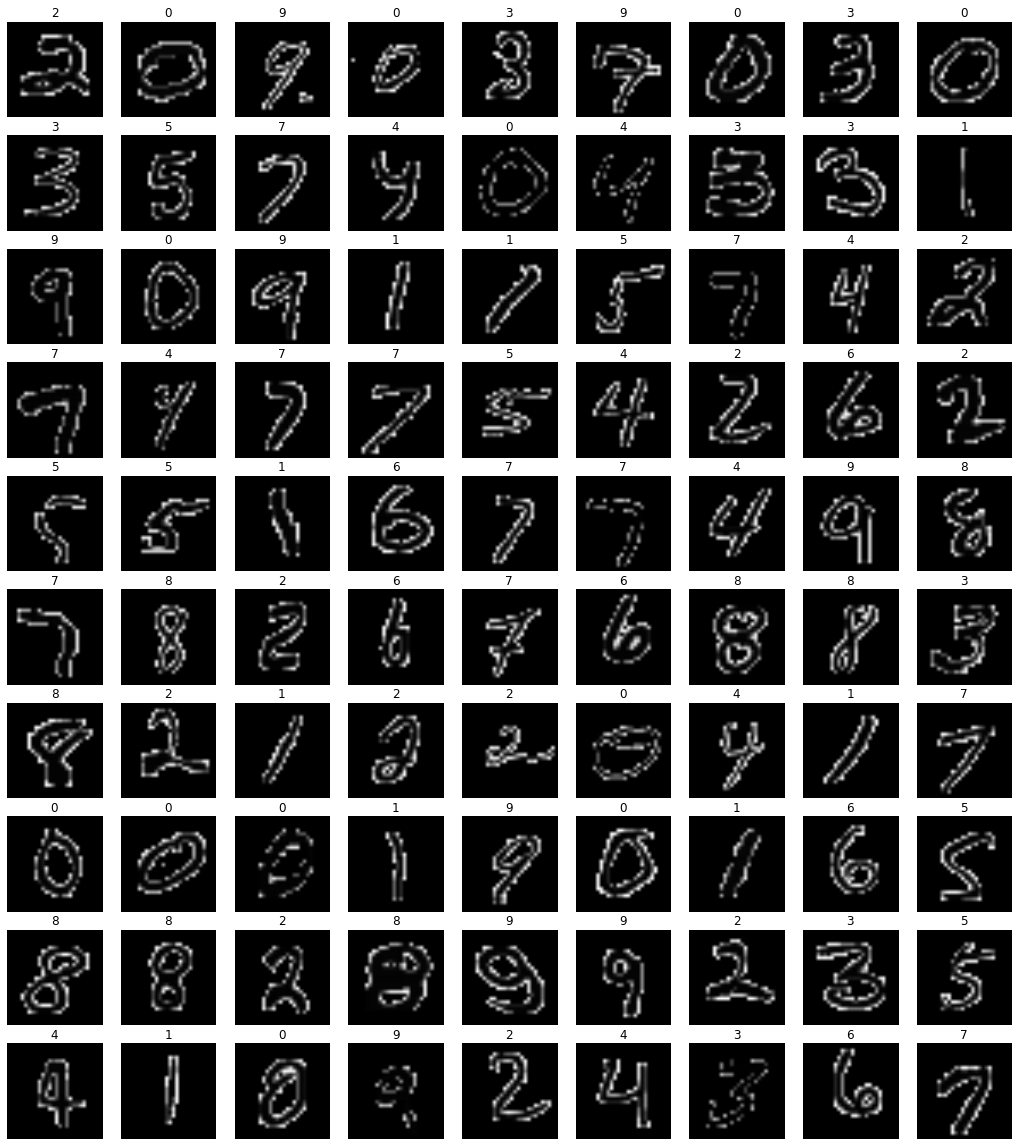

In [18]:
image_counter=0
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,20))
while image_counter<90:
    
    Image = makeimage(Kaggle_Test_x[image_counter])
        
    Feed_Data = np.array(Kaggle_Test_x[image_counter].reshape(28,28))
    model_out = np.argmax(model.predict([Feed_Data])[0])
    
    
    y = fig.add_subplot(10,9,image_counter+1)
    y.imshow(Image)
    plt.title(model_out)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    image_counter+=1
plt.show()

In [16]:
def makeimage(d1_array):
    import numpy as np
    d3_array=[]
    i=0
    while i<28:
        row=[]
        j=0
        while j<28:
            cell=[]
            k=0
            while k<3:
                cell.append(d1_array[i*28+j])
                k+=1
            row.append(np.array(cell))
            j+=1
        d3_array.append(np.array(row))
        i+=1
    d3_array = np.array(d3_array)
    return d3_array

### Generating Submission File:

In [41]:
import pandas as pd

output_ls = []
i=0
while i<len(Kaggle_Test_x):
    Feed_Data = np.array(Kaggle_Test_x[i].reshape(28,28))
    model_out = np.argmax(model.predict([Feed_Data])[0])
    output_ls.append(model_out)
    if i%2000==0:
        print(str(100*i/len(Kaggle_Test_x))+"% Complete")
    i+=1

0.0% Complete
7.142857142857143% Complete
14.285714285714286% Complete
21.428571428571427% Complete
28.571428571428573% Complete
35.714285714285715% Complete
42.857142857142854% Complete
50.0% Complete
57.142857142857146% Complete
64.28571428571429% Complete
71.42857142857143% Complete
78.57142857142857% Complete
85.71428571428571% Complete
92.85714285714286% Complete


In [42]:
i=0
counter=[]
while i<len(Kaggle_Test_x):
    counter.append(i+1)
    i+=1

In [43]:
Output_frame = pd.DataFrame(counter,columns=["ImageId"])
Output_frame['Label'] = output_ls
Output_frame.to_csv("MNIST_Kaggle_submission.csv")